### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Download Breast Cancer Data from Kaggle

Install the Kaggle API by running `!pip install kaggle` in a Jupyter Notebook cell.

In [2]:
!pip install kaggle


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
# import the json module
import json 

# Open the kaggle.json file and read the contents into the 'kaggle_api_key' variable
with open('kaggle.json') as f:
    kaggle_api_key = json.load(f)

# Set the KAGGLE_USERNAME environment variable to the value of the 'username' key from the kaggle_api_key dictionary
os.environ['KAGGLE_USERNAME'] = kaggle_api_key['username']

# Set the KAGGLE_KEY environment variable to the value of the 'key' key from the kaggle_api_key dictionary
os.environ['KAGGLE_KEY'] = kaggle_api_key['key']

Download the desired dataset from Kaggle by running `!kaggle datasets download -d [dataset-owner/dataset-name] `in a Jupyter Notebook cell.

In [4]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
!unzip breast-cancer-wisconsin-data.zip -d data/
!rm breast-cancer-wisconsin-data.zip


100%|███████████████████████████████████████| 48.6k/48.6k [00:00<00:00, 280kB/s]
100%|███████████████████████████████████████| 48.6k/48.6k [00:00<00:00, 279kB/s]
Archive:  breast-cancer-wisconsin-data.zip
replace data/data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


### Loading and Basic Preprocessing

In [2]:
cancer_data = pd.read_csv('data/data.csv')
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Check if there are null values in any of the columns.
cancer_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
# Remove Unnamed: 32 and id columns
cancer_data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis (EDA)

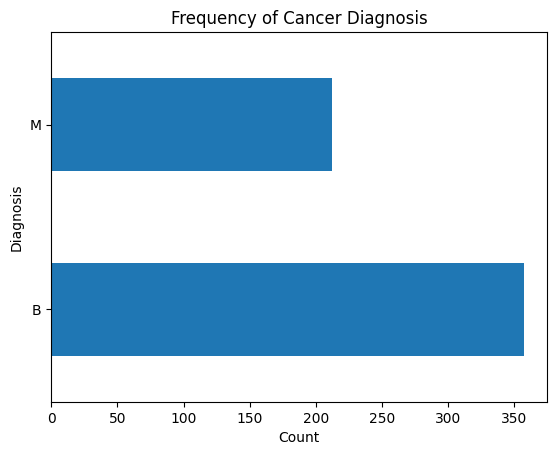

In [5]:
import matplotlib.pyplot as plt

# Plot the frequency of each value of the 'diagnosis' column
cancer_data['diagnosis'].value_counts().plot.barh()

# Add a title to the plot
plt.title("Frequency of Cancer Diagnosis")
# Add a label for the x-axis
plt.xlabel("Count")
# Add a label for the y-axis
plt.ylabel("Diagnosis")
# Show the plot
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
cancer_data['diagnosis'] = labelencoder.fit_transform(cancer_data['diagnosis'].values)
cancer_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Split Datasets


In [12]:
# Feature Selection
X = cancer_data.iloc[:,2:]
Y = cancer_data.iloc[:,0]

# Scaling the data with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

#pd.DataFrame(X_Scaled).describe()

In [13]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [27]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scaled,Y,test_size = 0.4,random_state = 786)

### Logistic Regression Method

In [31]:
# building logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Prediction for cancer_data
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

In [29]:
#!pip install scikit-plot==0.3.7

In [34]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[148,   0],
       [  4,  76]])

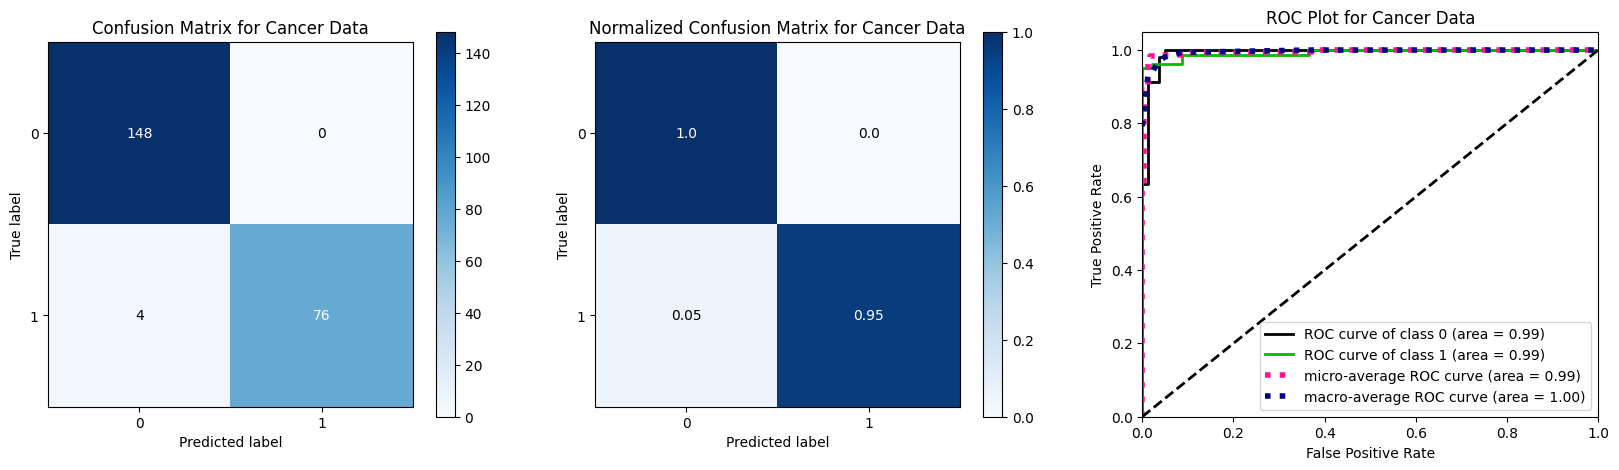

In [37]:
import matplotlib.pyplot as plt
import scikitplot as skplt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot the first confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for Cancer Data', ax=ax1)

# Plot the second confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title = 'Normalized Confusion Matrix for Cancer Data', ax=ax2)

# Plot for Roc Curve
skplt.metrics.plot_roc(y_test, y_proba , title = 'ROC Plot for Cancer Data',  ax=ax3)

plt.show()


### Result:
The first row represents the actual benign cases. Out of these, 148 were correctly classified as benign, and `0 were incorrectly classified as malignant`. The second row,represents the actual malignant cases. Out of these, `4 were incorrectly classified `as benign, and 76 were correctly classified as malignant.

In this particular case, the classifier has a high accuracy of `97.5% (148 + 76) / (148 + 76 + 4 + 0)`. However, this accuracy score may not be representative of the classifier's performance when it comes to real-world applications.

For cancer prediction, a high number of false negatives (FN) is particularly concerning. A false negative refers to a case where the classifier predicts the class label as benign, even though the actual class label is malignant. In this confusion matrix, there are 4 false negatives. This means that there are 4 cases where the classifier has missed a malignant tumor, which could have serious consequences for the patient.

In comparison, false positives (FP) are not as concerning, as they refer to cases where the classifier predicts a malignant tumor when the actual class label is benign. In this confusion matrix, there are 0 false positives.

In conclusion, for cancer prediction, it's crucial to consider both accuracy scores and the distribution of false negatives and false positives. A high accuracy score alone may not be enough to guarantee that the classifier is providing reliable results. It's important to focus on reducing the number of false negatives, and to ensure that the classifier is providing an adequate number of true positives.